# Tabular Playground Series - Jan 2022. Regression


# 0. Libs

In [152]:
# Import all the tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots inside the notebook
%matplotlib inline 

# 1. Data Preprocessing

* NaN: fillna (pandas), imputer (sklearn), pd.api.types (use filna, loop) if large dataset
* Removing unnecessary columns (like id)
* Objects -> int columns: OneHotEncoder() (sklearn), pd.get_dummies (pandas, define all columns, clever lib)
* Check and remove outliers if needed
* Convert datetime with new int columns

## Access to Google Drive

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.1. Loading data

### File contains year sales. 
* Predict `num_sold`

In [154]:
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Kaggle_jan_2022/train.csv")

In [155]:
# Let's see the data
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [156]:
df.tail()

,row_id,date,country,store,product,num_sold
26293,26293,2018-12-31,Sweden,KaggleMart,Kaggle Hat,823
26294,26294,2018-12-31,Sweden,KaggleMart,Kaggle Sticker,250
26295,26295,2018-12-31,Sweden,KaggleRama,Kaggle Mug,1004
26296,26296,2018-12-31,Sweden,KaggleRama,Kaggle Hat,1441
26297,26297,2018-12-31,Sweden,KaggleRama,Kaggle Sticker,388


In [157]:
# Let's see shape
df.shape

(26298, 6)

In [158]:
# Let's see the types of data
df.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

In [159]:
# Check for NaN values.
df.isna().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

### Removing unnecessary columns

In [160]:
df_without_id = df.copy()

In [161]:
df_without_id = df_without_id.drop('row_id', axis = 1)

In [162]:
df_without_id.head()

,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [163]:
df_without_id.shape

(26298, 5)

### Result in section

* There are no NaN values. Types: 2 x int63; 4 x object. Also `row_id` column was repalced.

## 1.2. Data visualization

### Distributions

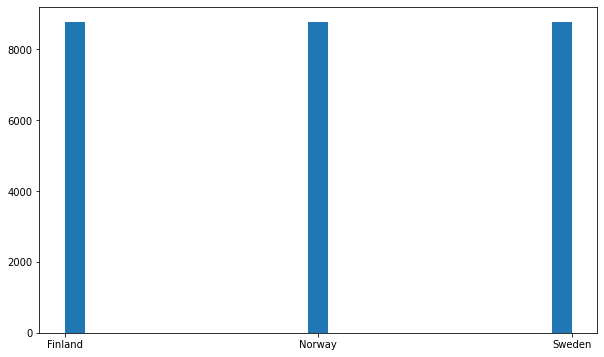

In [164]:
# see the 'date' distribution

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df_without_id['country'], bins=25);

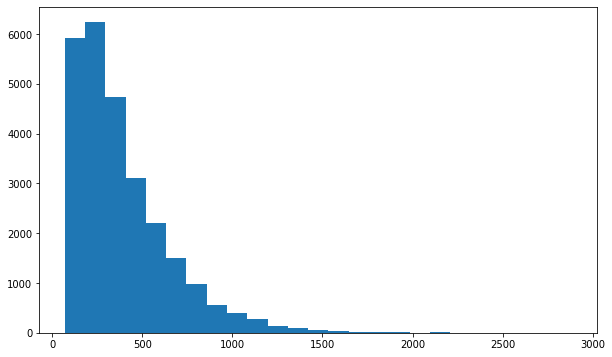

In [165]:
# see the 'num_sold' distribution

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(df_without_id['num_sold'], bins=25);

### Result in section

* Not needed to check outliers (no int/double columns). Most of sales are small (see distribution).

## 1.3. Data aggregation

In [166]:
# Make a copy
df_agr = df_without_id.copy()

In [167]:
df_agr.head()

,date,country,store,product,num_sold
0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


### Date adjustment

In [168]:
df_agr['date'] = pd.to_datetime(df_agr['date'], format='%Y-%m-%d')

In [169]:
df_agr.dtypes

date        datetime64[ns]
country             object
store               object
product             object
num_sold             int64
dtype: object

In [170]:
# Add datetime parameter for saledate column
df_agr["saleYear"] = df_agr.date.dt.year
df_agr["saleMonth"] = df_agr.date.dt.month
df_agr["saleDay"] = df_agr.date.dt.day

# # Now we can remove date column
df_agr.drop("date", axis =1, inplace=True)


df_agr.head()

,country,store,product,num_sold,saleYear,saleMonth,saleDay
0,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


### Add distributions

In [171]:
# def add_data_distributions(df_agr):
#     np.random.seed(42)

#     fix, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14,5))
#     ax1.set_title("normal distribution")
#     ax2.set_title("uniform distribution")
#     ax3.set_title("laplace distribution")
#     for i in range(3):
#         df_agr.loc[:, f'norm_{i}'] = np.random.normal(loc=np.random.randint(low=0, high=10), 
#                                                  scale=np.random.randint(low=1, high=10), 
#                                                  size=(df_agr.shape[0], 1))
    
#         df_agr.loc[:, f'unif_{i}'] = np.random.uniform(low=np.random.randint(low=1, high=4), 
#                                                   high=np.random.randint(low=5, high=10), 
#                                                   size=(df_agr.shape[0], 1))
#         df_agr.loc[:, f'lapl_{i}'] = np.random.laplace(loc=np.random.randint(low=0, high=10), 
#                                                   scale=np.random.randint(low=1, high=10), 
#                                                   size=(df_agr.shape[0], 1))
#         # visualize
#         sns.kdeplot(df_agr[f'norm_{i}'], ax=ax1)
#         sns.kdeplot(df_agr[f'unif_{i}'], ax=ax2)
#         sns.kdeplot(df_agr[f'lapl_{i}'], ax=ax3)

#     # new df_agr
#     df_agr.head()
#     return df_agr

In [172]:
# df_agr = add_data_distributions(df_agr)

In [173]:
# df_agr.head(2)

### One-hot encoding

In [174]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["country","store", "product", 'num_sold', 'saleYear', 'saleMonth', 'saleDay']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_df = transformer.fit_transform(df_agr)
transformed_df

<26298x1432 sparse matrix of type '<class 'numpy.float64'>'
	with 184086 stored elements in Compressed Sparse Row format>

In [175]:
# see column names
df_agr.head()

,country,store,product,num_sold,saleYear,saleMonth,saleDay
0,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


In [176]:
# Let's see values
df_agr.country.value_counts()

Sweden     8766
Finland    8766
Norway     8766
Name: country, dtype: int64

In [177]:
df_agr.store.value_counts()

KaggleRama    13149
KaggleMart    13149
Name: store, dtype: int64

In [178]:
# df_agr.product.value_counts

In [179]:
# Use pandas unstead sklearn onehot
df_onehot = pd.get_dummies(df_agr[["country","store", "product", 'num_sold', 'saleYear', 'saleMonth', 'saleDay']])
df_onehot.head()

,num_sold,saleYear,saleMonth,saleDay,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,329,2015,1,1,1,0,0,1,0,0,1,0
1,520,2015,1,1,1,0,0,1,0,1,0,0
2,146,2015,1,1,1,0,0,1,0,0,0,1
3,572,2015,1,1,1,0,0,0,1,0,1,0
4,911,2015,1,1,1,0,0,0,1,1,0,0


In [180]:
df_onehot.shape

(26298, 12)

### Split the data


In [181]:
# Function for splitting data
def splitting(df): 
  x = df.drop("num_sold", axis=1)
  y = df['num_sold']
  from sklearn.model_selection import train_test_split
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  return x_train, x_test, y_train, y_test

In [182]:
x_train, x_test, y_train, y_test = splitting(df_onehot)

In [183]:
y_train.head()

22691     274
15668     227
8935      626
7786     1044
24357     452
Name: num_sold, dtype: int64

### Result in section

* Data has been processed, splitted, one-hoted

In [184]:
# # This will turn all of the string value into category values also can be used for NaNs
# for label, content in df_tmp.items():
#     if pd.api.types.is_string_dtype(content):
#         df_tmp[label] = content.astype("category").cat.as_ordered()

# 2. Regression models

## RandomForestRegressor()

In [185]:
%%time 

# Let's bould the ml model
#np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, #all cores of cpu
                             random_state=42)   
model.fit(x_train, y_train)

CPU times: user 4.12 s, sys: 29.8 ms, total: 4.15 s
Wall time: 2.26 s


In [186]:
x_train.head(2)

,saleYear,saleMonth,saleDay,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
22691,2018,6,14,0,1,0,0,1,0,0,1
15668,2017,5,20,0,1,0,1,0,0,0,1


In [187]:
y_train.head(2)

22691    274
15668    227
Name: num_sold, dtype: int64

In [188]:
model.score(x_test,y_test)

0.9464637115955151

## Comparison models


In [189]:
# !pip install catboost

In [190]:
# # Put model in a dictionary
# from catboost import CatBoostRegressor
# from sklearn.linear_model import Lasso, Ridge

# models = {"CatBoost": CatBoostRegressor(verbose=False),
#          "Random Forest": RandomForestRegressor(),
#           "Lasso": Lasso(),
#           "Ridge": Ridge(),}

# # Create the function to fit and score models
# def fit_and_score(models, x_train, x_test, y_train, y_test):
#     """
#     Fits and evaluates given ml models
#     """
    
#     # Set random seed
#     np.random.seed(42)
#     # Make a dictionary to keep scores
#     model_scores = {}
#     #Loop through model
#     for name, model in models.items():
#         # Fit the model to the data
#         model.fit(x_train, y_train)
#         # Evaluate the model append its scores to model_scores
#         model_scores[name] = model.score(x_test, y_test)
#     return model_scores

In [191]:
# model_scores = fit_and_score(models=models,
#                             x_train=x_train,
#                             x_test=x_test,
#                             y_train=y_train,
#                             y_test=y_test)
# model_scores

## Neural networks

In [192]:
# # Neural network tools

# from keras.models import Sequential # Keras
# from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense # layers
# from tensorflow.keras.optimizers import Adam # Optimizer
# import tensorflow as tf

In [193]:
# # Load Tensorboard notebook extension
# %load_ext tensorboard

In [194]:
# # Function for TensorBoard callback
# def create_tensorboard_callback():
#     # Create a log directory for logs of training
#     logdir = os.path.join('/content/drive/MyDrive/Colab_Notebooks/logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#     return tf.keras.callbacks.TensorBoard(logdir)

In [195]:
# print("GPU", "available" if tf.config.list_physical_devices("GPU") else "not available")

In [196]:
# model = Sequential()
# model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [197]:
# model.summary()

In [198]:
# import os, datetime
# tensorboard = create_tensorboard_callback()
# # Fit the model
# model.fit(x_train, y_train, epochs=100, batch_size=50, verbose=2,callbacks=[tensorboard])

In [199]:
# %tensorboard --logdir tensor_board_dir 

## Evaluating function

In [200]:
# Create evaluation function (RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_test)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Test MAE": mean_absolute_error(y_test, val_preds),
              "Training RMSLE": rmsle(y_train,train_preds),
              "Test RMSLE": rmsle(y_test,val_preds),
              "Training R^2": r2_score(y_train,train_preds),
              "Test R^2": r2_score(y_test,val_preds)}
    return scores

In [201]:
show_scores(model)

{'Test MAE': 41.15626996197718,
 'Test RMSLE': 0.12746050063289177,
 'Test R^2': 0.9464637115955151,
 'Training MAE': 14.752439870710141,
 'Training RMSLE': 0.04640764240857804,
 'Training R^2': 0.9926741875021202}

## Symmetric mean absolute percentage error on train 

In [202]:
# train_preds = model.predict(x_train)
# def smape(A, F):
#     return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# print(smape(y_train, train_preds))

## Result in section

* Regression model was build. Also you can find differnet errors list

# 3. Load test and Train on full dataset

## Load test data

In [203]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Kaggle_jan_2022/test.csv')

In [204]:
df_test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


## Check test data

In [205]:
df_test.isna().sum()

row_id     0
date       0
country    0
store      0
product    0
dtype: int64

In [206]:
df_test.dtypes

row_id      int64
date       object
country    object
store      object
product    object
dtype: object

## Preprocess test data

In [207]:
df_test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [208]:
df_test = df_test.drop('row_id', axis=1)

### Date adjustment

In [209]:
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d')

In [210]:
df_test.dtypes

date       datetime64[ns]
country            object
store              object
product            object
dtype: object

In [211]:
# Add datetime parameter for saledate column
df_test["saleYear"] = df_test.date.dt.year
df_test["saleMonth"] = df_test.date.dt.month
df_test["saleDay"] = df_test.date.dt.day

# # Now we can remove date column
df_test.drop("date", axis =1, inplace=True)


df_test.head()

,country,store,product,saleYear,saleMonth,saleDay
0,Finland,KaggleMart,Kaggle Mug,2019,1,1
1,Finland,KaggleMart,Kaggle Hat,2019,1,1
2,Finland,KaggleMart,Kaggle Sticker,2019,1,1
3,Finland,KaggleRama,Kaggle Mug,2019,1,1
4,Finland,KaggleRama,Kaggle Hat,2019,1,1


### One-hot encoding

In [212]:
# Let's try and convert our data to numbers
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['country','store', 'product', 'saleYear', 'saleMonth', 'saleDay']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                remainder="passthrough")

transformed_df = transformer.fit_transform(df_test)
transformed_df

<6570x52 sparse matrix of type '<class 'numpy.float64'>'
	with 39420 stored elements in Compressed Sparse Row format>

In [213]:
# see column names
df_test.head()

,country,store,product,saleYear,saleMonth,saleDay
0,Finland,KaggleMart,Kaggle Mug,2019,1,1
1,Finland,KaggleMart,Kaggle Hat,2019,1,1
2,Finland,KaggleMart,Kaggle Sticker,2019,1,1
3,Finland,KaggleRama,Kaggle Mug,2019,1,1
4,Finland,KaggleRama,Kaggle Hat,2019,1,1


In [214]:
# Let's see values
df_test.country.value_counts()

Norway     2190
Sweden     2190
Finland    2190
Name: country, dtype: int64

In [215]:
df_test.store.value_counts()

KaggleRama    3285
KaggleMart    3285
Name: store, dtype: int64

In [216]:
# df_agr.product.value_counts

In [217]:
# Use pandas unstead sklearn onehot
df_test_onehot = pd.get_dummies(df_test[['country','store', 'product', 'saleYear', 'saleMonth', 'saleDay']])
df_test_onehot.head()

,saleYear,saleMonth,saleDay,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,2019,1,1,1,0,0,1,0,0,1,0
1,2019,1,1,1,0,0,1,0,1,0,0
2,2019,1,1,1,0,0,1,0,0,0,1
3,2019,1,1,1,0,0,0,1,0,1,0
4,2019,1,1,1,0,0,0,1,1,0,0


In [218]:
df_test_onehot.shape

(6570, 11)

## Train on full dataset


In [219]:
df_onehot.head(2)

,num_sold,saleYear,saleMonth,saleDay,country_Finland,country_Norway,country_Sweden,store_KaggleMart,store_KaggleRama,product_Kaggle Hat,product_Kaggle Mug,product_Kaggle Sticker
0,329,2015,1,1,1,0,0,1,0,0,1,0
1,520,2015,1,1,1,0,0,1,0,1,0,0


In [220]:
# Function for splitting data
def splitting_full(df): 
  x = df.drop("num_sold", axis=1)
  y = df['num_sold']
  return x, y

In [221]:
x, y = splitting_full(df_onehot)

In [222]:
x.shape, y.shape

((26298, 11), (26298,))

In [223]:
# %%time 

# # Let's bould the ml model
# #np.random.seed(42)
# from sklearn.ensemble import RandomForestRegressor

# model_full = RandomForestRegressor(n_jobs=-1, #all cores of cpu
#                              random_state=42)   
# model_full.fit(x, y)

# # model_full = CatBoostRegressor(verbose=False)
# # model_full.fit(x, y)


In [224]:
model_full = Sequential()
model_full.add(Dense(128, activation='relu', input_shape=(x.shape[1],)))
model_full.add(Dense(1))
model_full.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_full.fit(x, y, epochs=100, batch_size=50, verbose=2,callbacks=[tensorboard])

Epoch 1/100
526/526 - 1s - loss: 71049.8594 - mae: 200.6794 - 1s/epoch - 2ms/step
Epoch 2/100
526/526 - 1s - loss: 67821.9766 - mae: 196.2315 - 952ms/epoch - 2ms/step
Epoch 3/100
526/526 - 1s - loss: 64177.4453 - mae: 190.0716 - 969ms/epoch - 2ms/step
Epoch 4/100
526/526 - 1s - loss: 57688.4102 - mae: 178.6453 - 951ms/epoch - 2ms/step
Epoch 5/100
526/526 - 1s - loss: 48825.6758 - mae: 161.4304 - 963ms/epoch - 2ms/step
Epoch 6/100
526/526 - 1s - loss: 39358.2383 - mae: 140.9206 - 974ms/epoch - 2ms/step
Epoch 7/100
526/526 - 1s - loss: 31406.4043 - mae: 120.8919 - 978ms/epoch - 2ms/step
Epoch 8/100
526/526 - 1s - loss: 25848.2539 - mae: 106.1973 - 978ms/epoch - 2ms/step
Epoch 9/100
526/526 - 1s - loss: 22687.8848 - mae: 98.8254 - 948ms/epoch - 2ms/step
Epoch 10/100
526/526 - 1s - loss: 20511.1406 - mae: 94.2017 - 961ms/epoch - 2ms/step
Epoch 11/100
526/526 - 1s - loss: 19275.2910 - mae: 91.9811 - 927ms/epoch - 2ms/step
Epoch 12/100
526/526 - 1s - loss: 18460.9316 - mae: 90.3059 - 929ms/e

In [225]:
# model_full.score(x,y)

In [226]:
# train_preds_full = model_full.predict(x)
# def smape(A, F):
#     return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

# print(smape(y, train_preds_full))

## Predict on test data

In [227]:
y_preds_test = model_full.predict(df_test_onehot)

## Result in section

* Regression model was build for full dataset. Test data were preprocessed. `y_preds_test` was obtained

# 4. Sample submission

## Load sample submission

In [238]:
sample_sub = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Kaggle_jan_2022/sample_submission.csv')

In [239]:
sample_sub.head()

,row_id,num_sold
0,26298,100
1,26299,100
2,26300,100
3,26301,100
4,26302,100


In [240]:
sample_sub['num_sold'] = y_preds_test

In [241]:
sample_sub.head()

,row_id,num_sold
0,26298,284.020660
1,26299,620.849365
2,26300,86.352051
3,26301,525.192627
4,26302,873.185303


In [242]:
sample_sub.to_csv("/content/drive/MyDrive/Colab_Notebooks/outputs/sample_submission.csv", index=False)